In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## We will explore the following models
# Linear Regression
# Poly regression
# KNN regression
# Decision tree regression
# Support vector regression
# Boosted Trees Regression
# Random Forest Regression

In [5]:
df = pd.read_csv('/Users/kathanbhavsar/Desktop/Python,DS,ML/DATA/rock_density_xray.csv')

In [6]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [7]:
df.columns = ['Signal','Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

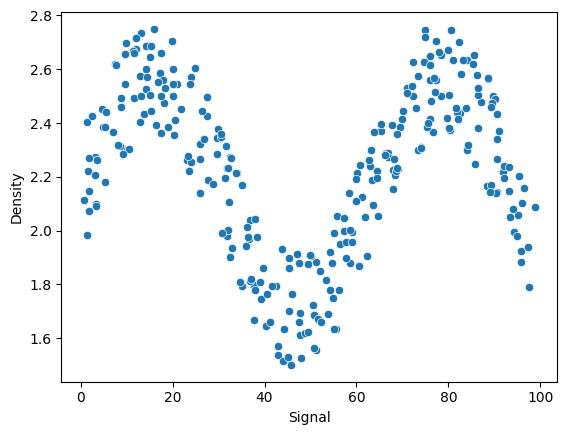

In [9]:
sns.scatterplot(x = 'Signal',y = 'Density',data = df)

In [18]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train,y_train)

LinearRegression()

In [24]:
pred = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [27]:
mae = mean_absolute_error(y_test,pred)
rmse = np.sqrt(mean_squared_error(y_test,pred))

In [29]:
mae,rmse

(0.24102551432457792, 0.29635030529174805)

In [32]:
sigmal_range = np.arange(0,100)
sigmal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [33]:
signal_preds = model.predict(sigmal_range.reshape(-1,1))

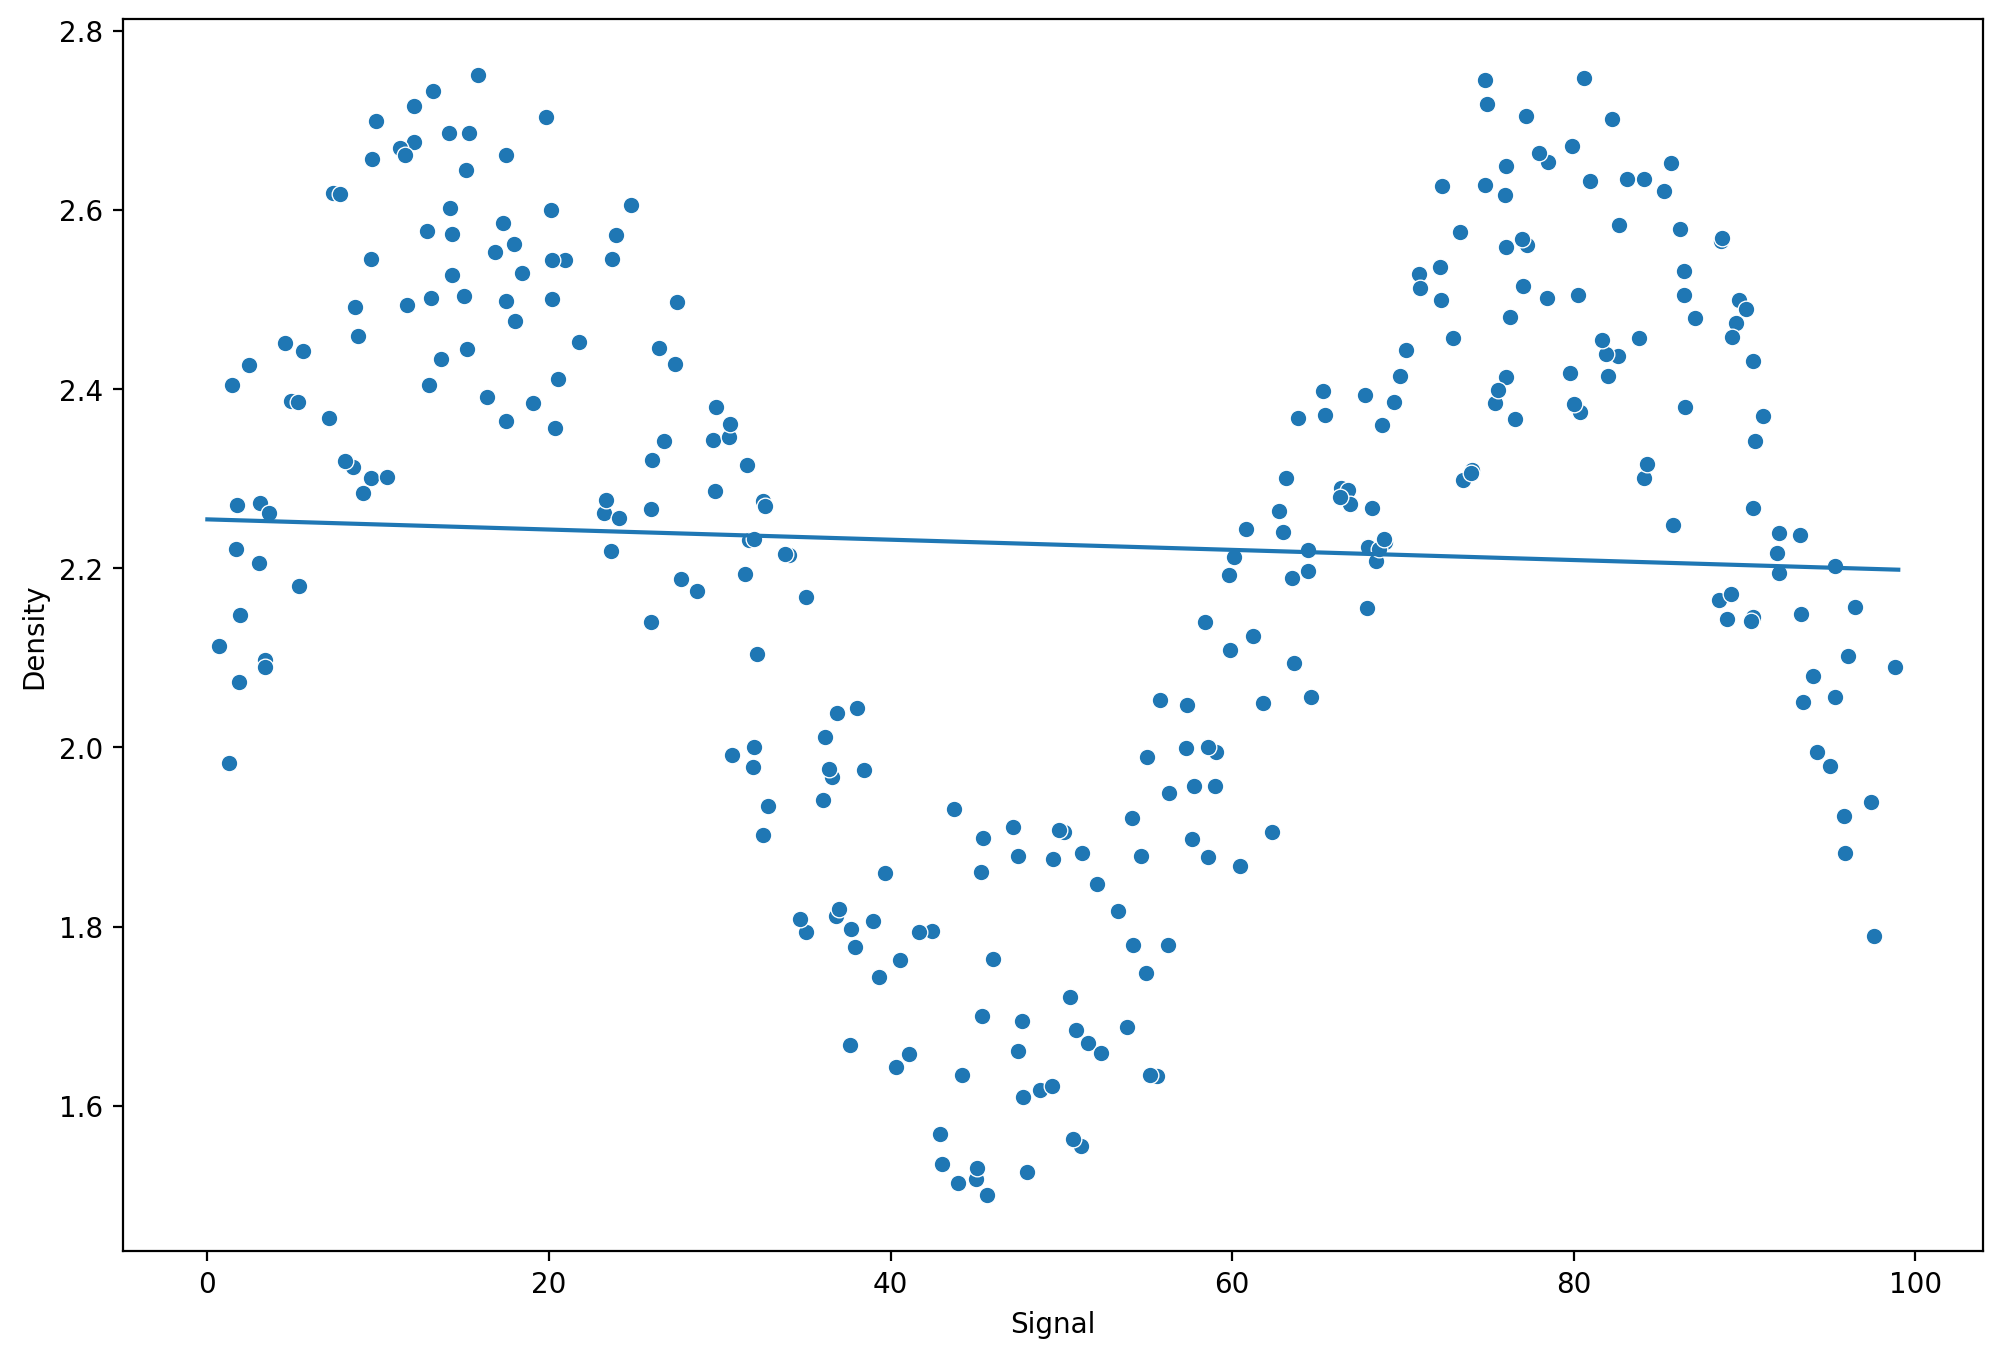

In [36]:
plt.figure(figsize=(12,8),dpi = 200)
sns.scatterplot(x = 'Signal',y = 'Density',data = df)
plt.plot(sigmal_range,signal_preds)

In [37]:
##Polynomial Regression

In [38]:
#helper function
def run_model(model,X_train,y_train,X_test,y_test):
    #Fit the model
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'RMSE:{rmse}')
    print(f'MAE:{mae}')
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    plt.figure(figsize=(12,8),dpi = 200)
    sns.scatterplot(x = 'Signal',y = 'Density',data = df)
    plt.plot(sigmal_range,output,color='red')

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [45]:
pipe = make_pipeline(PolynomialFeatures(degree=5),LinearRegression())

RMSE:0.1402777294192962
MAE:0.11791958867905032


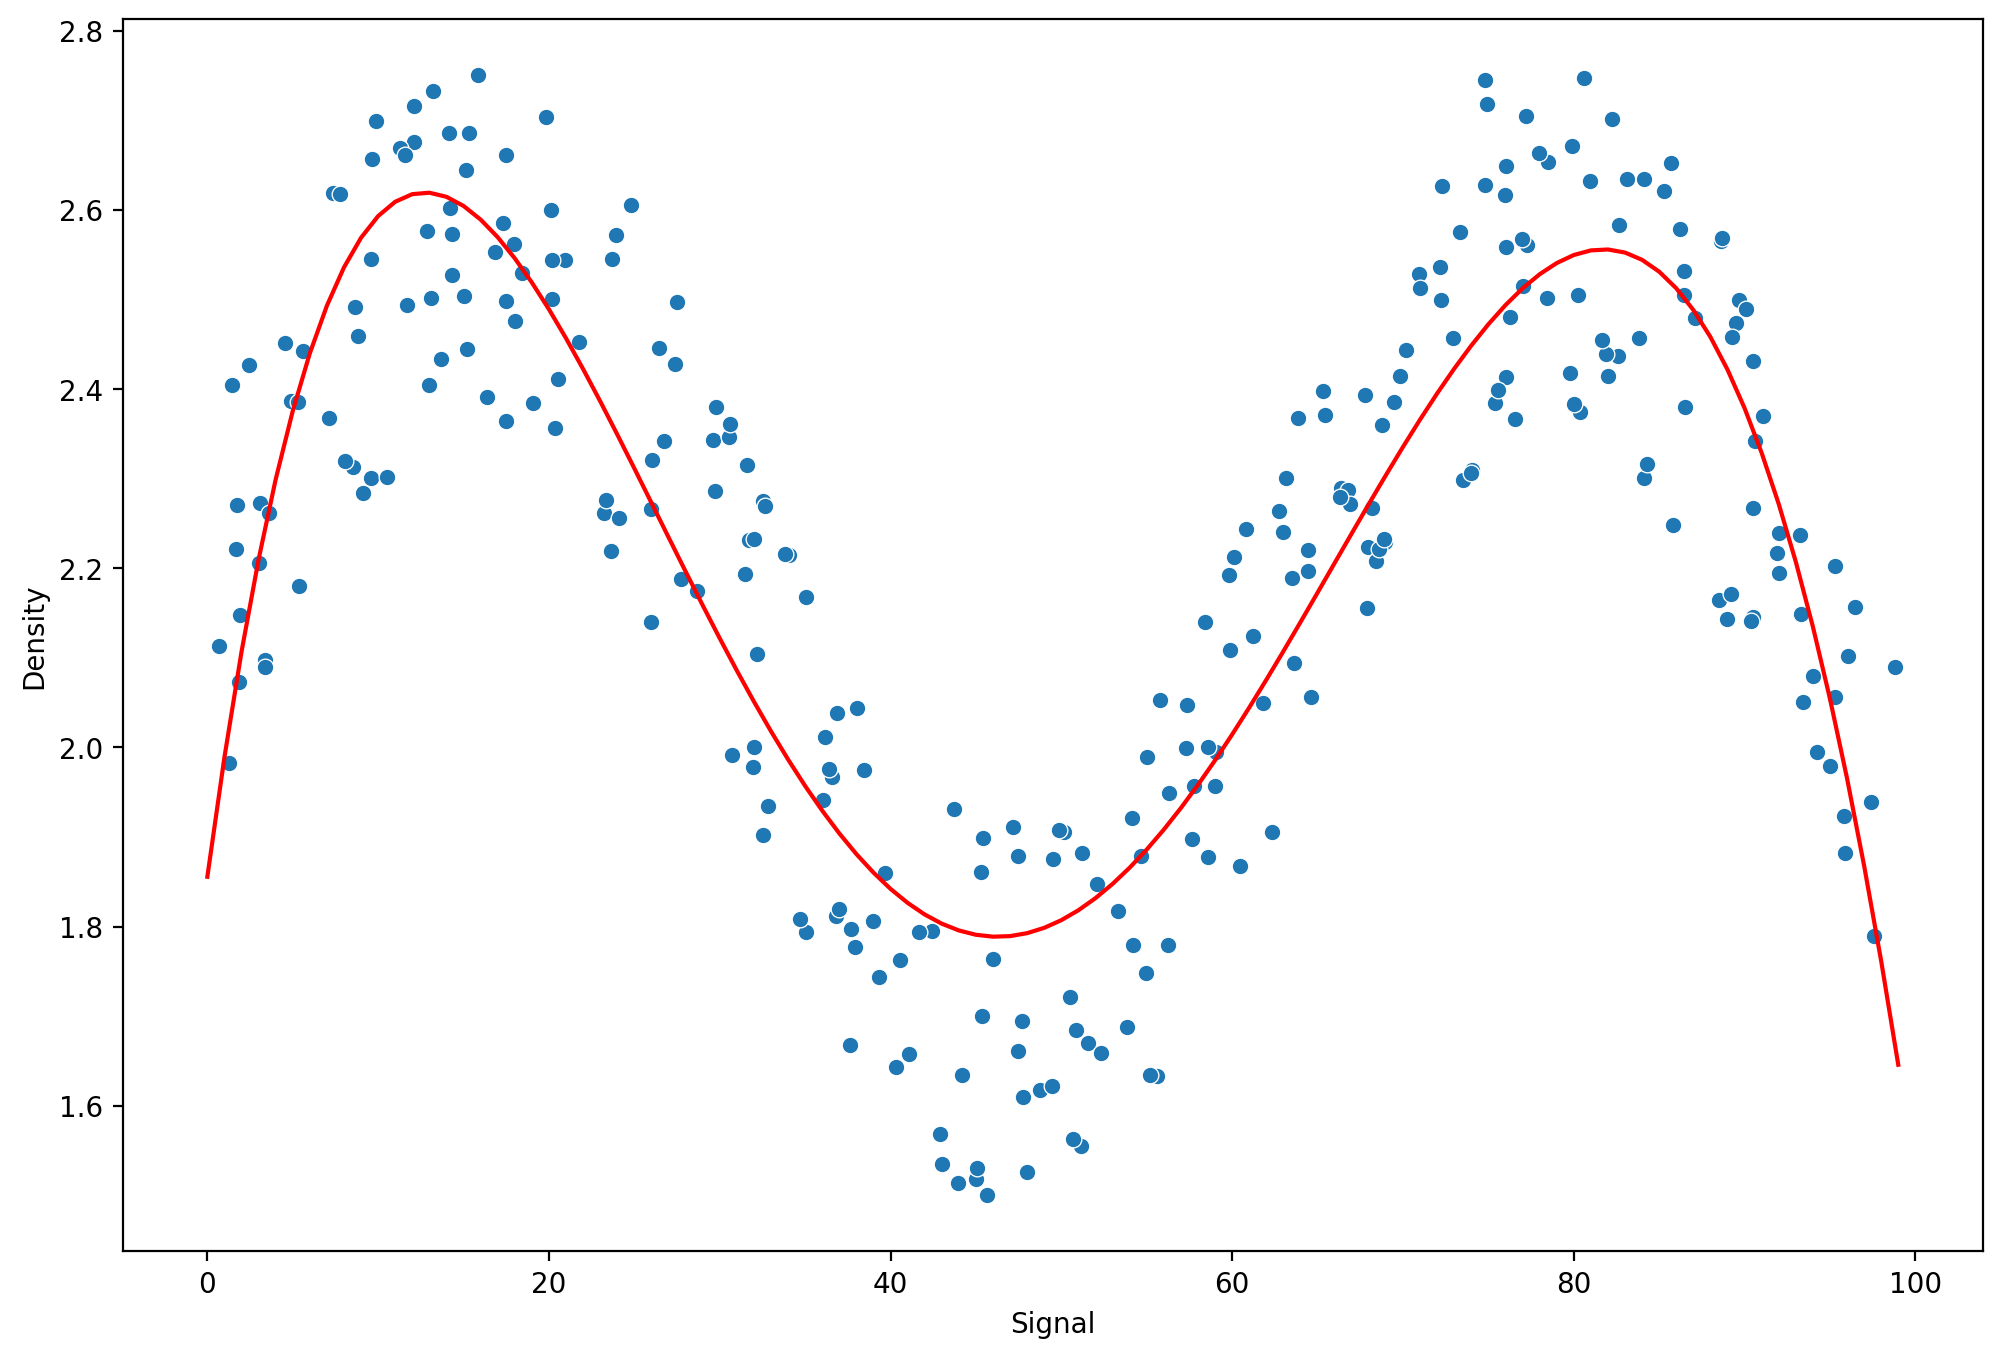

In [46]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [47]:
## Advanced Models

In [48]:
from sklearn.neighbors import KNeighborsRegressor

RMSE:0.16707571608725927
MAE:0.1206619084399996
RMSE:0.15404174541671728
MAE:0.13010617319422033
RMSE:0.1389085595310869
MAE:0.12000896423683943
RMSE:0.14713308336850064
MAE:0.1266223677919671


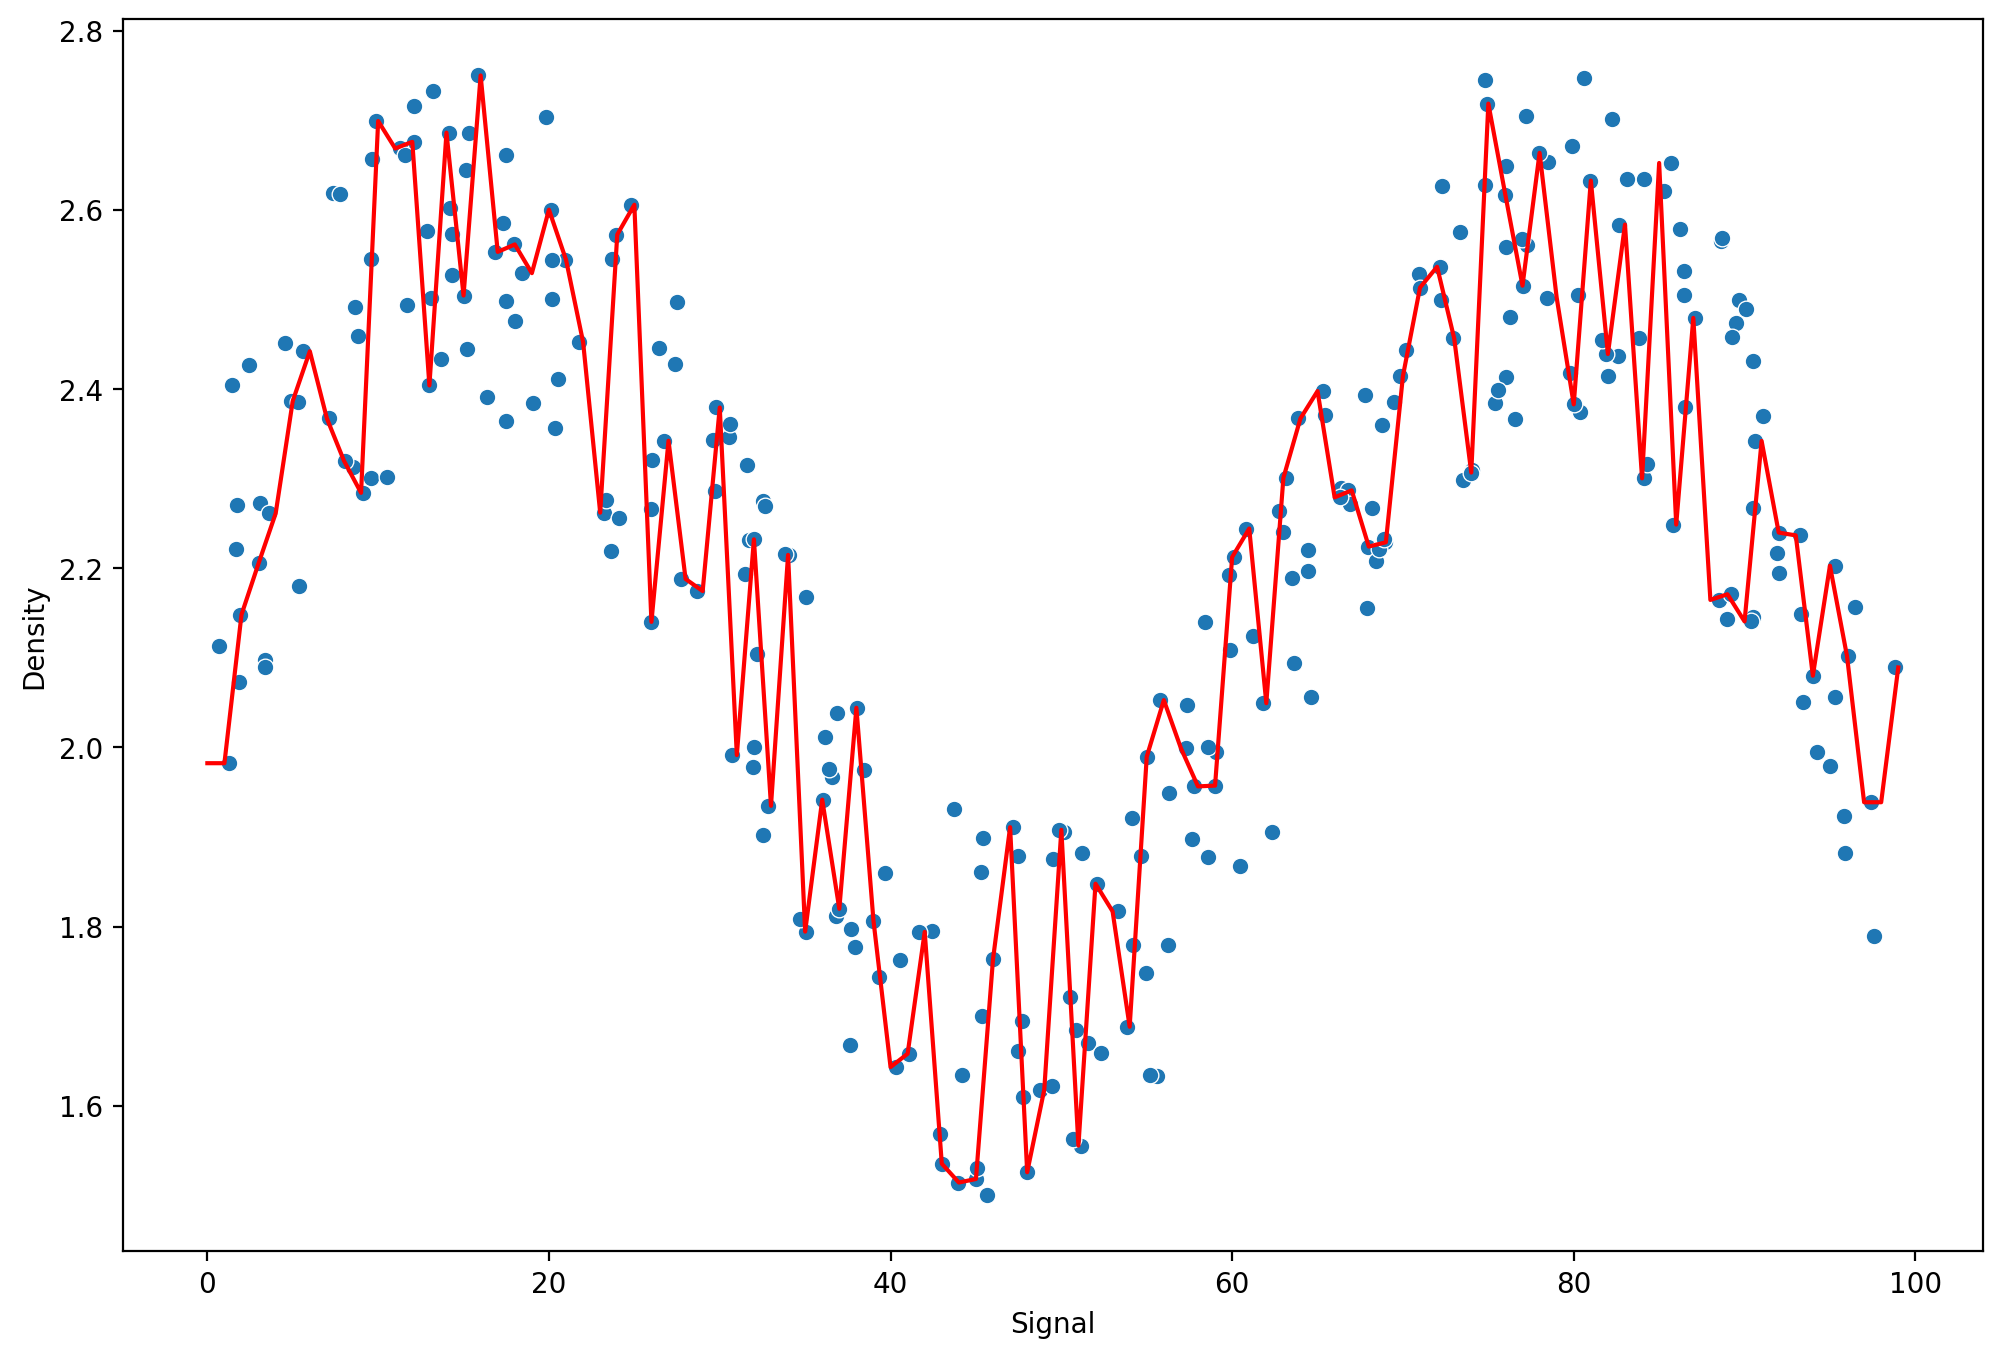

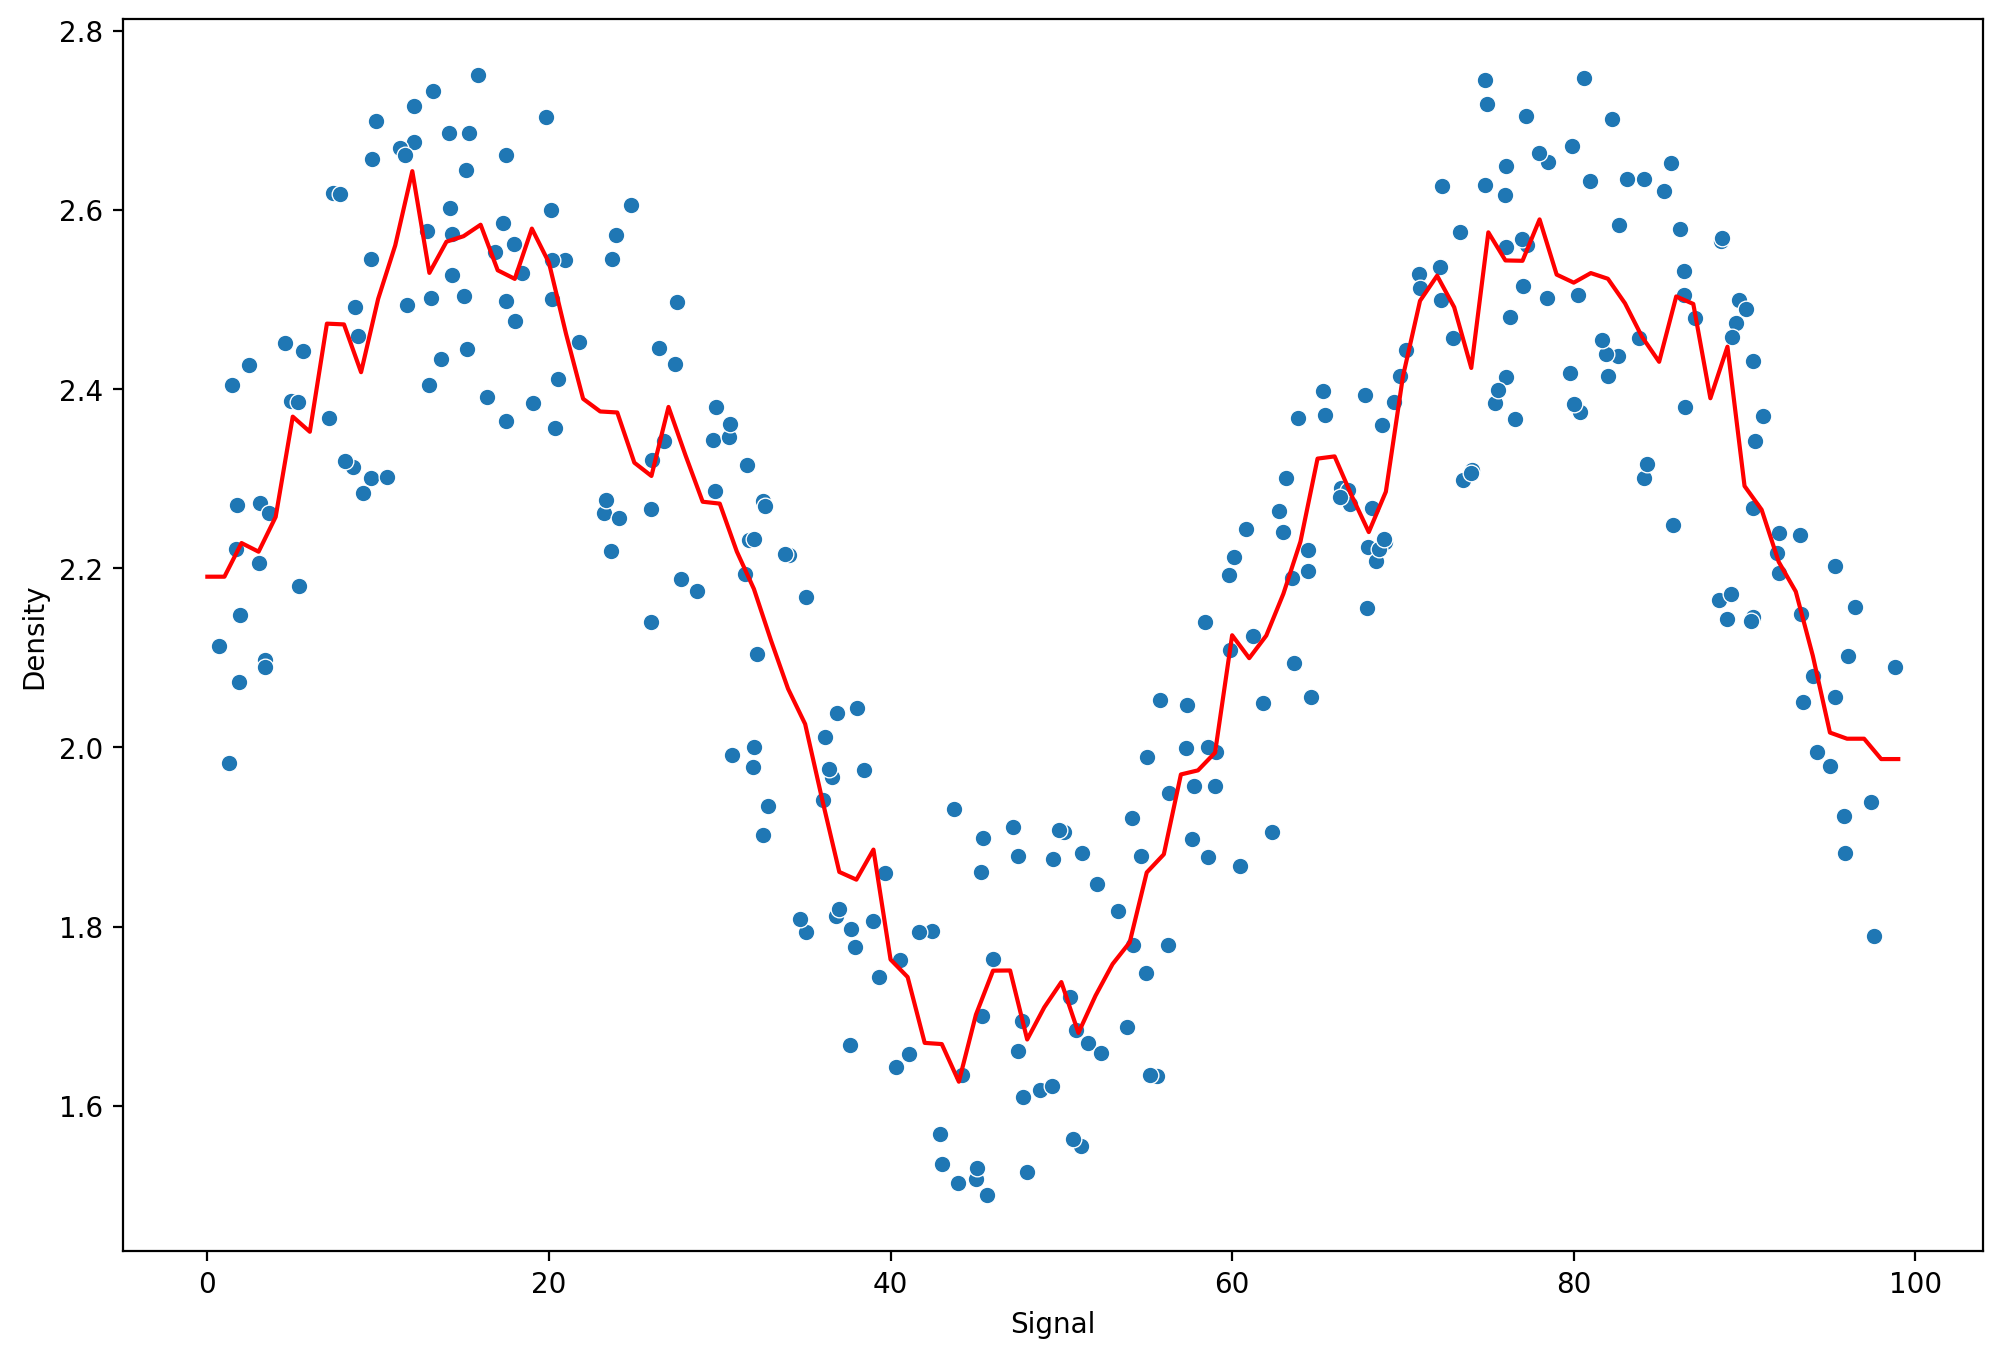

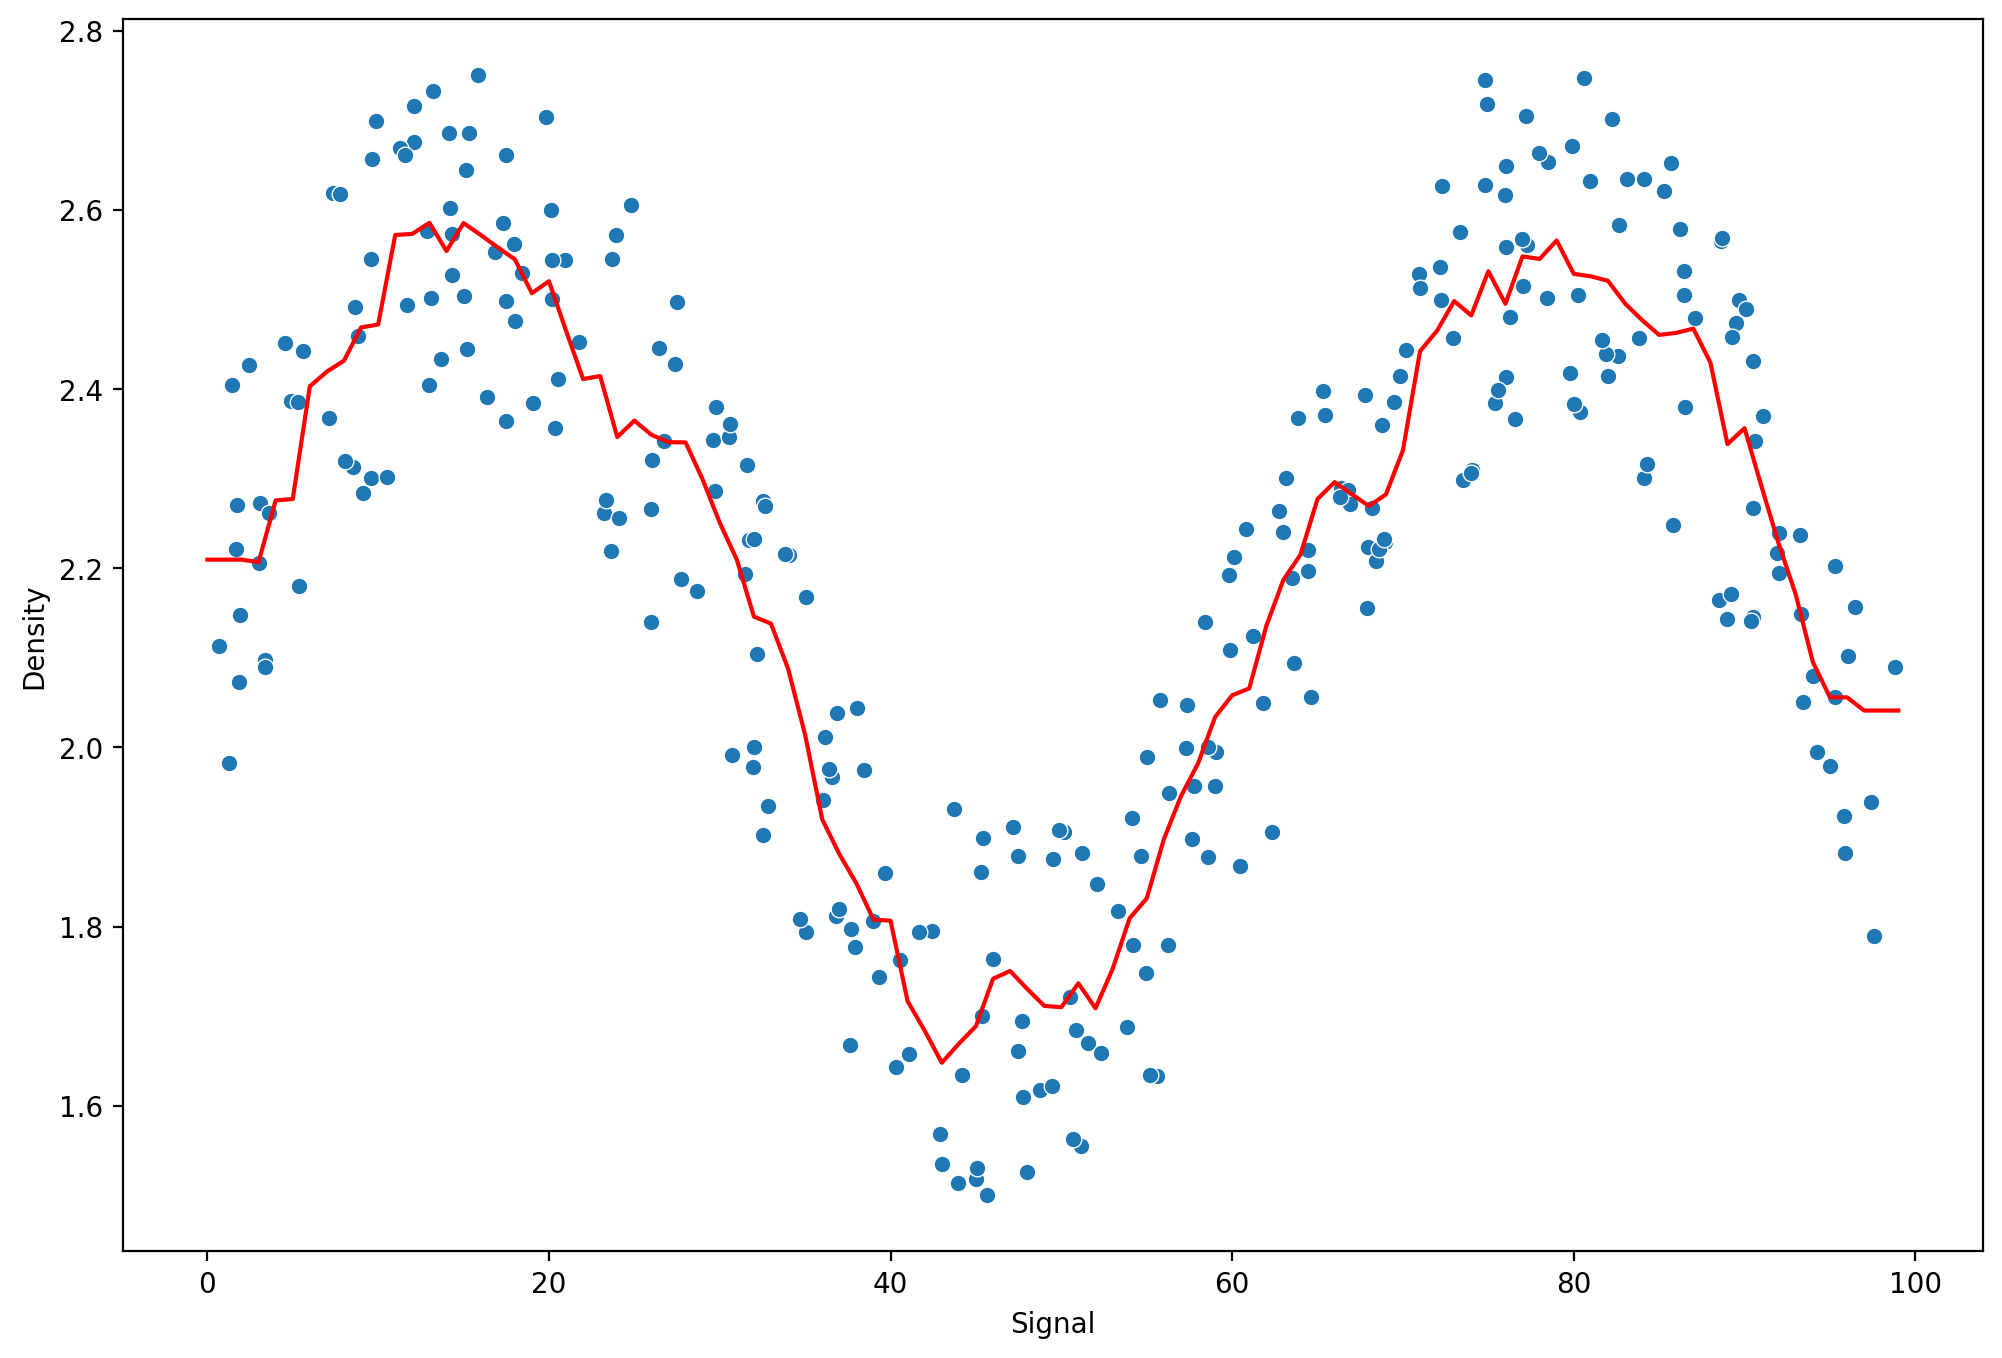

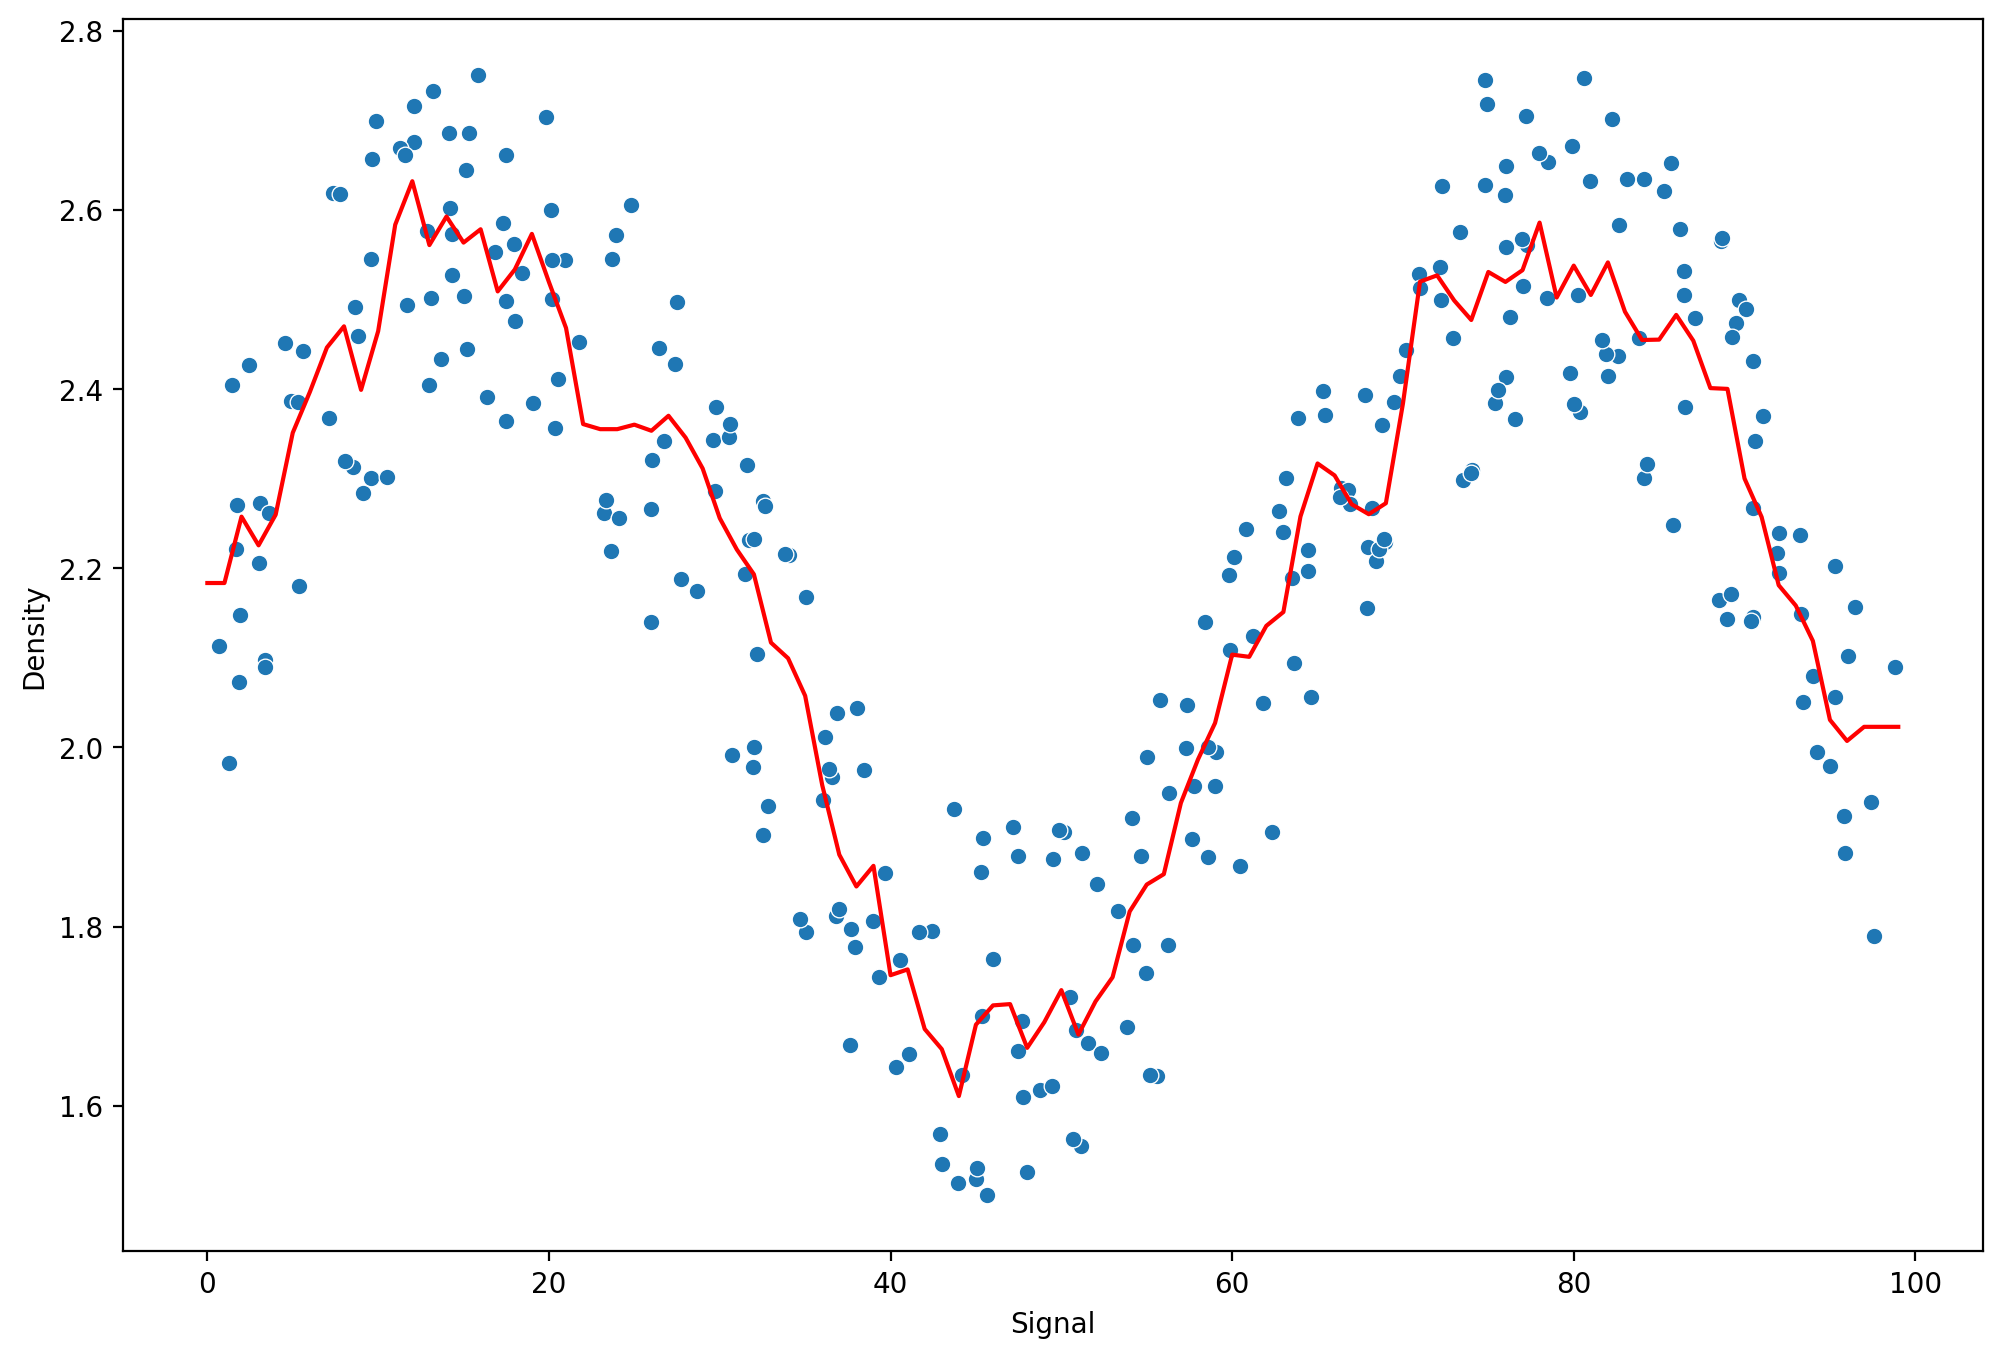

In [49]:
k_values = [1,5,10,6]
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

In [50]:
from sklearn.tree import DecisionTreeRegressor

RMSE:0.16707571608725927
MAE:0.1206619084399996


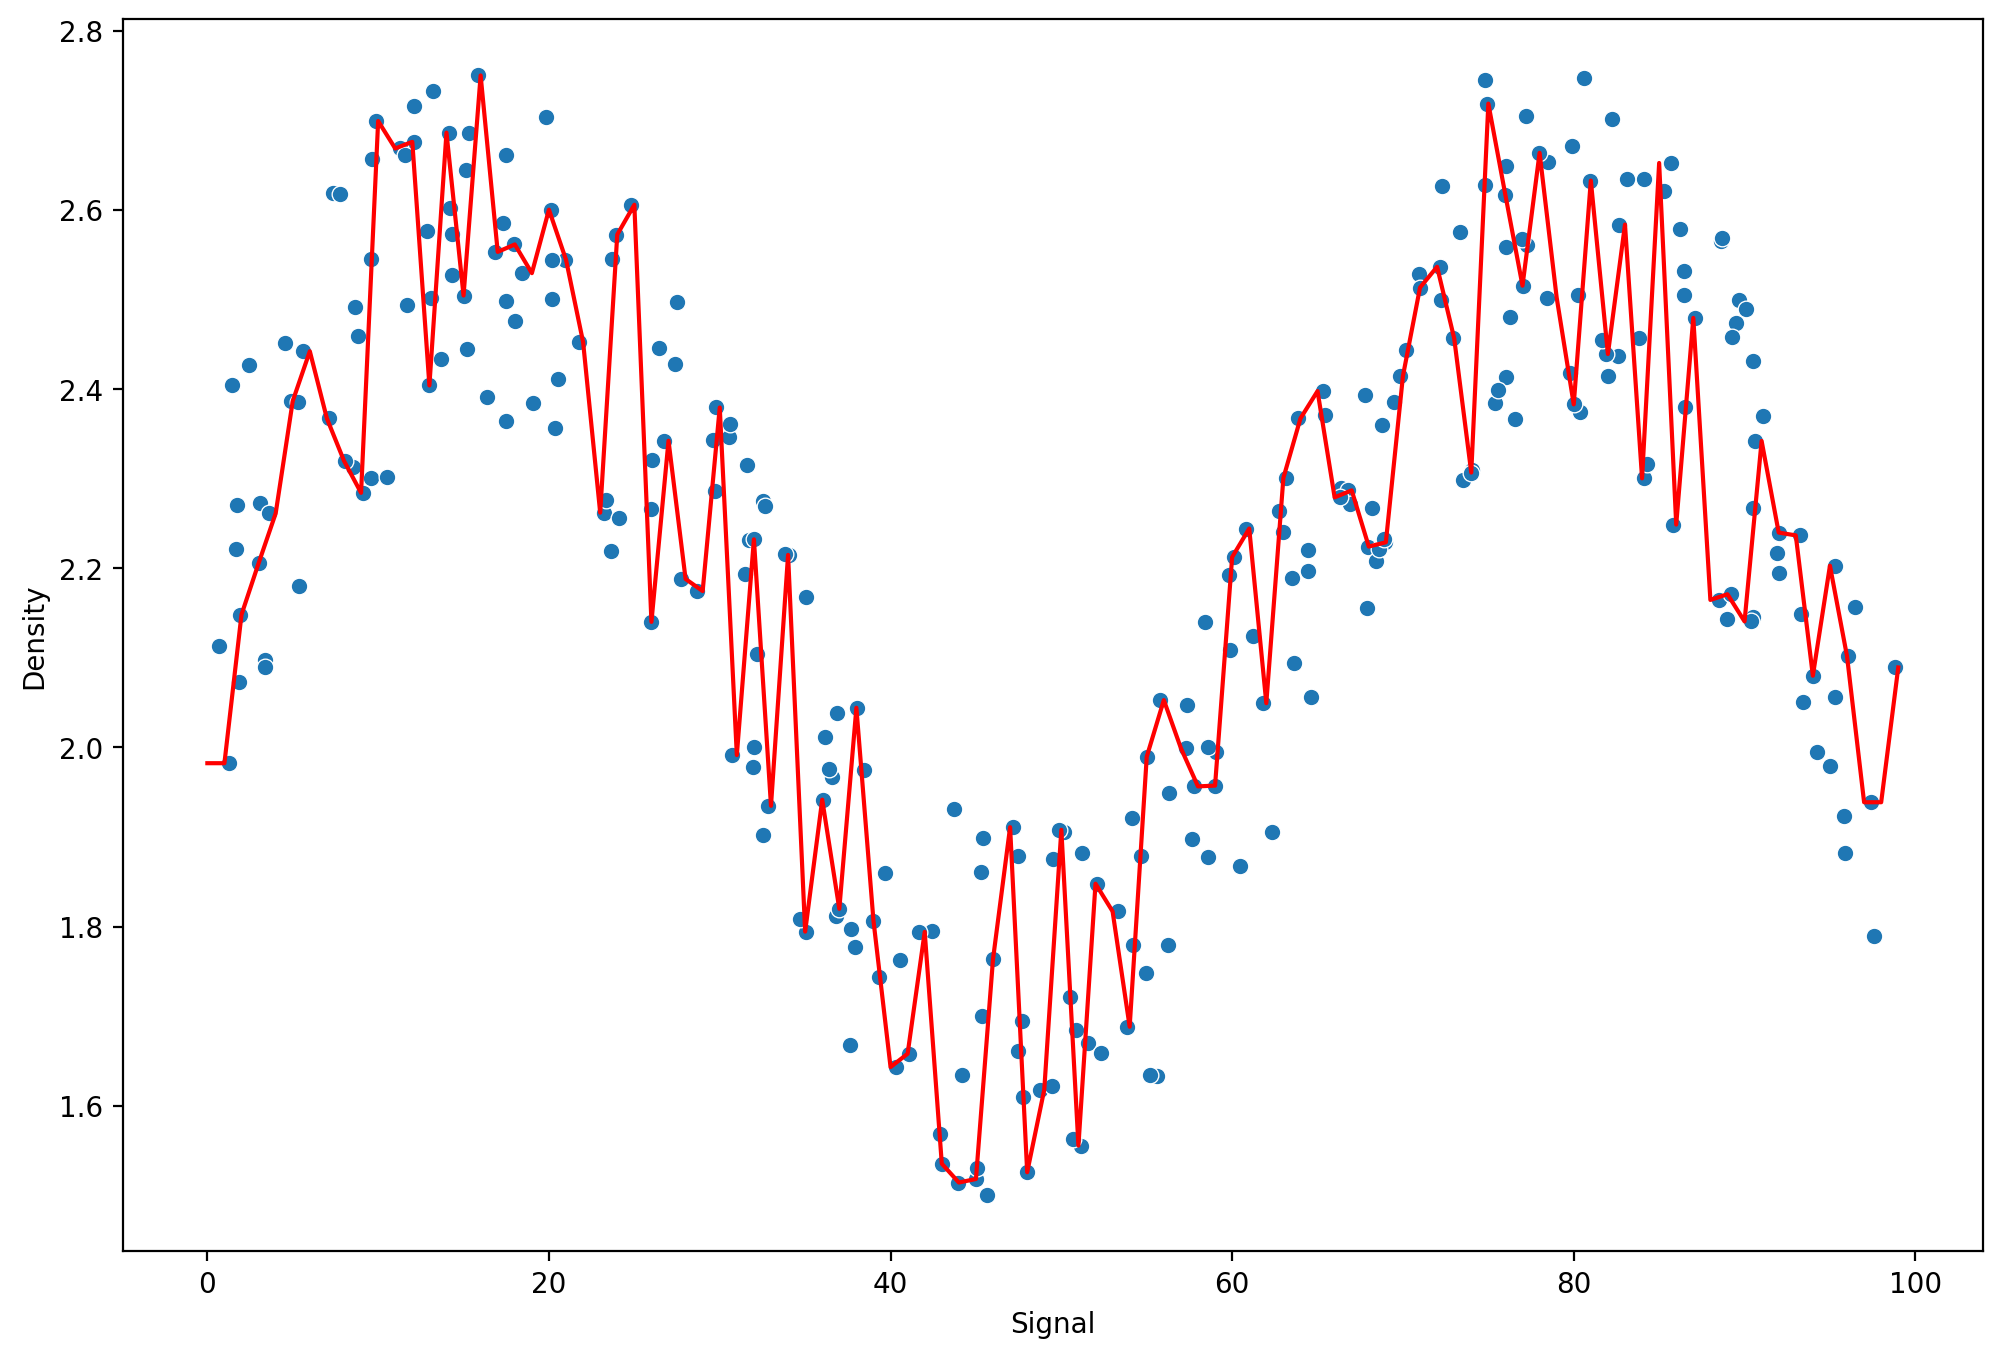

In [51]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [53]:
from sklearn.model_selection import GridSearchCV
from  sklearn.svm import SVR

RMSE:0.141542431349303
MAE:0.12672177161621223


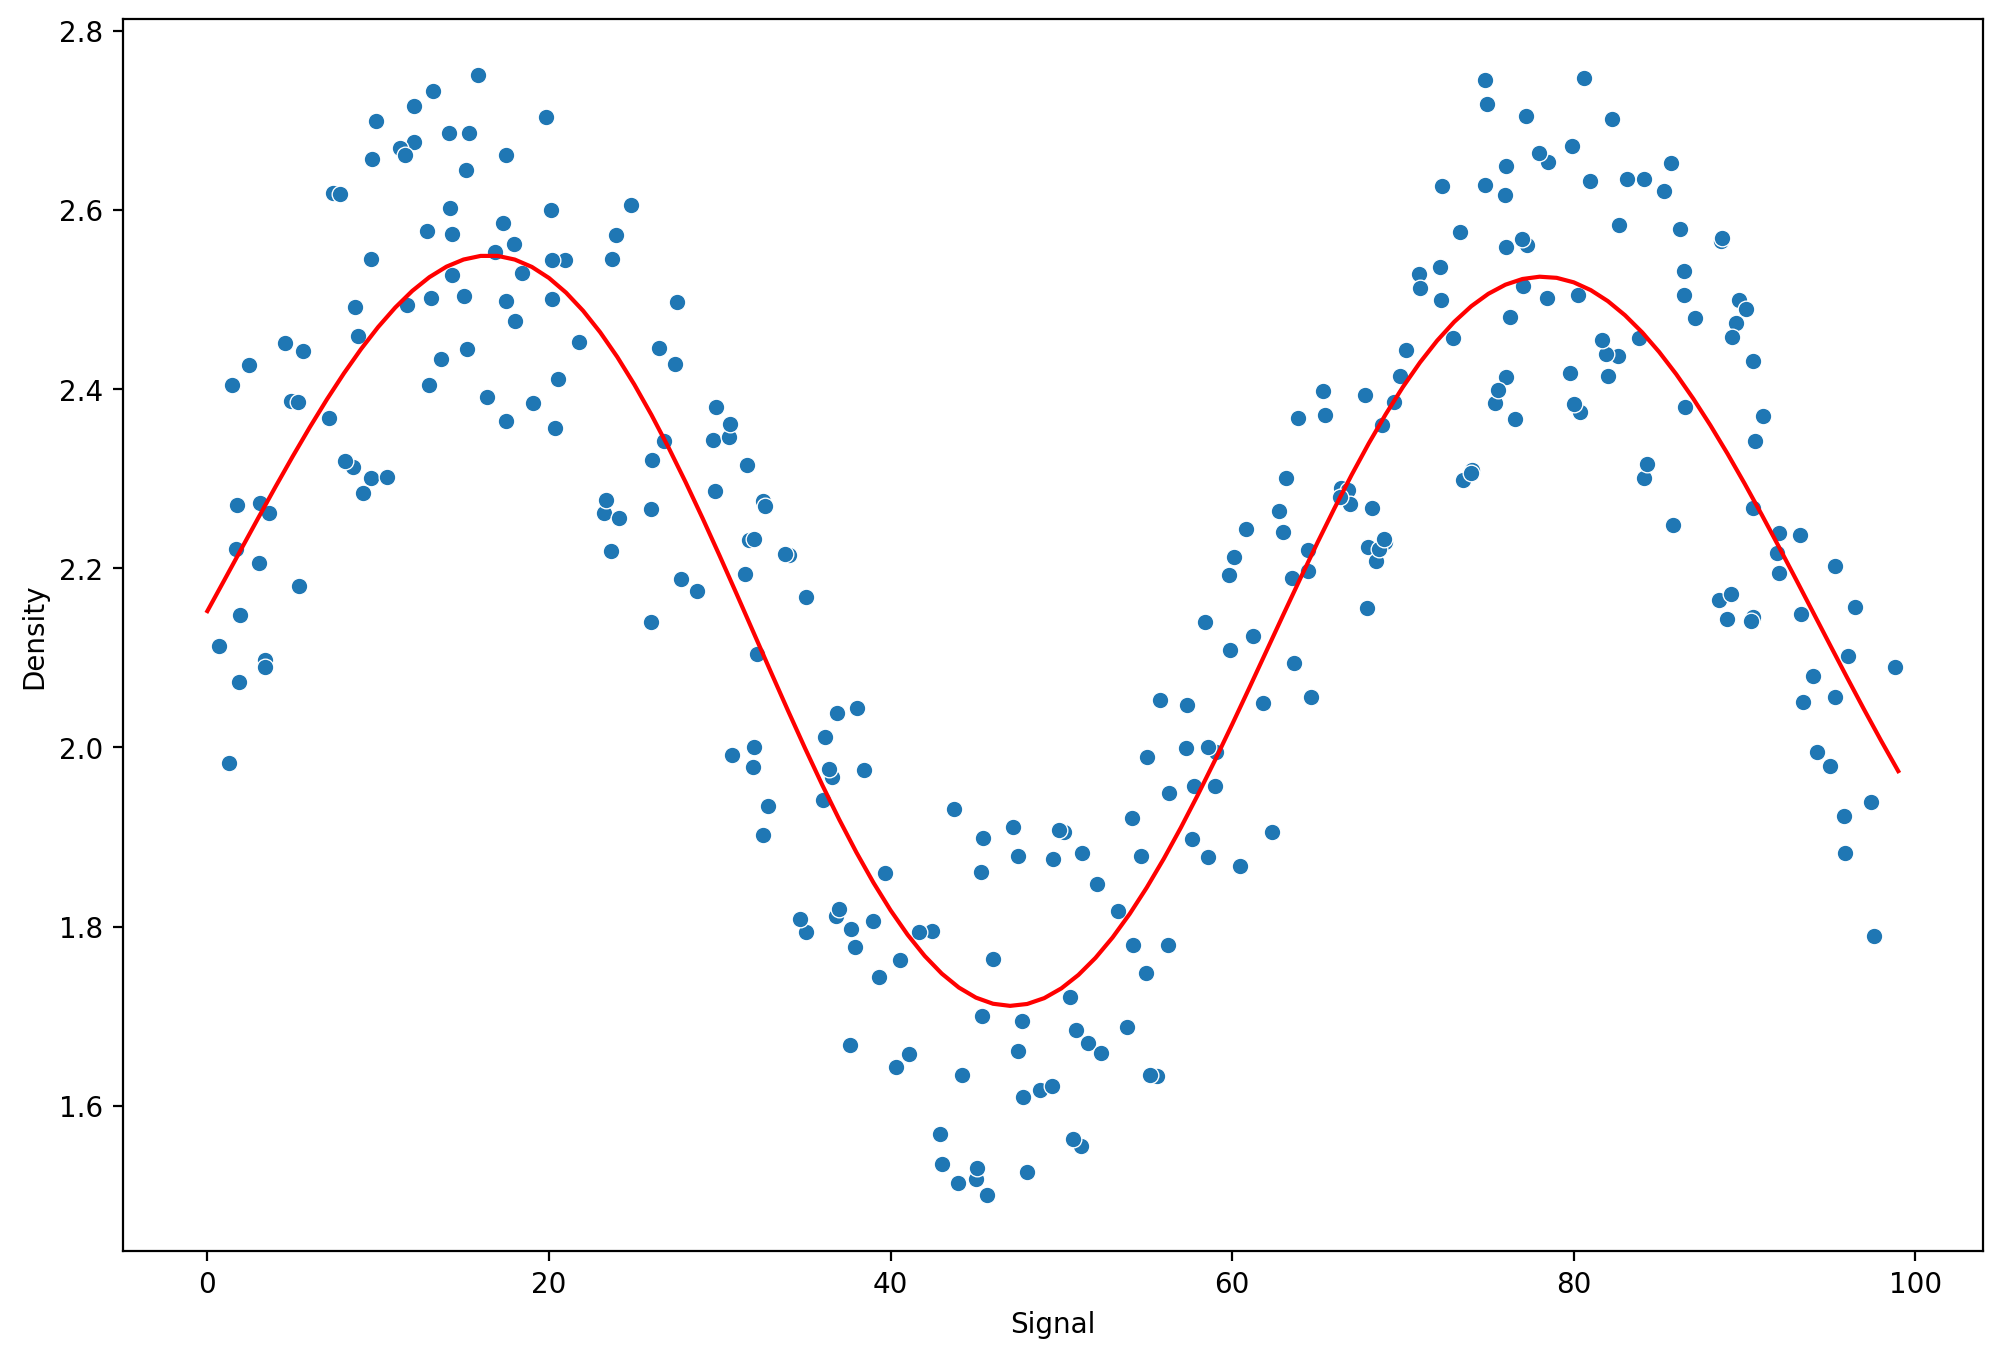

In [55]:
svr = SVR()
param_grid = {'C':[0.01,.1,1,5,10,100,1000],'gamma':['auto','scale']}
grid = GridSearchCV(svr,param_grid)
run_model(grid,X_train,y_train,X_test,y_test)

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rfr = RandomForestRegressor(n_estimators=10)

RMSE:0.13914051201012495
MAE:0.1119832609313178


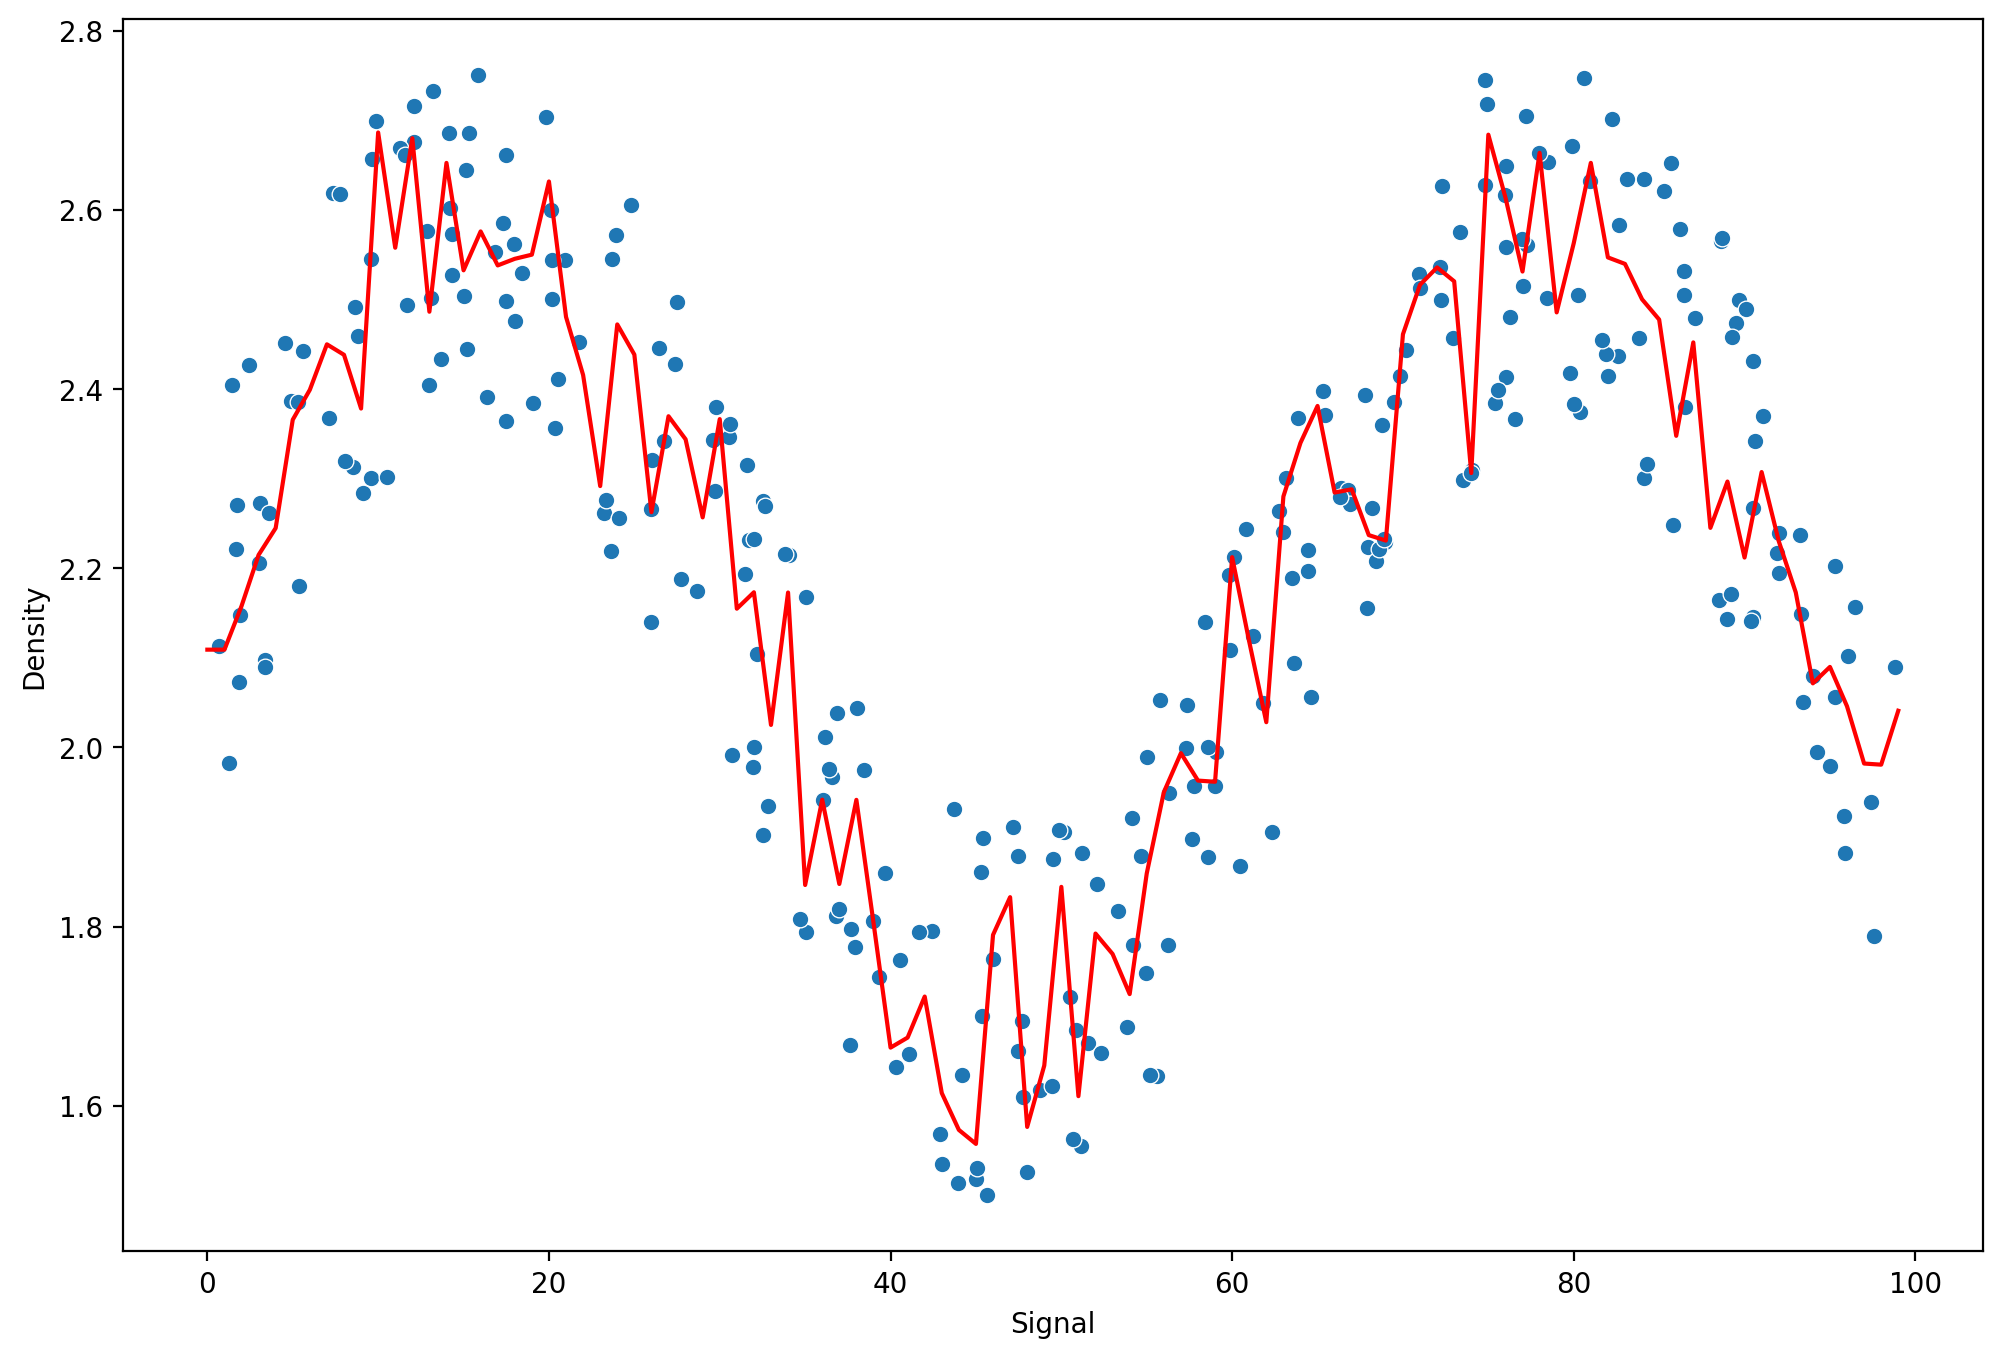

In [58]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [59]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

RMSE:0.14536433248271918
MAE:0.12703399592995443


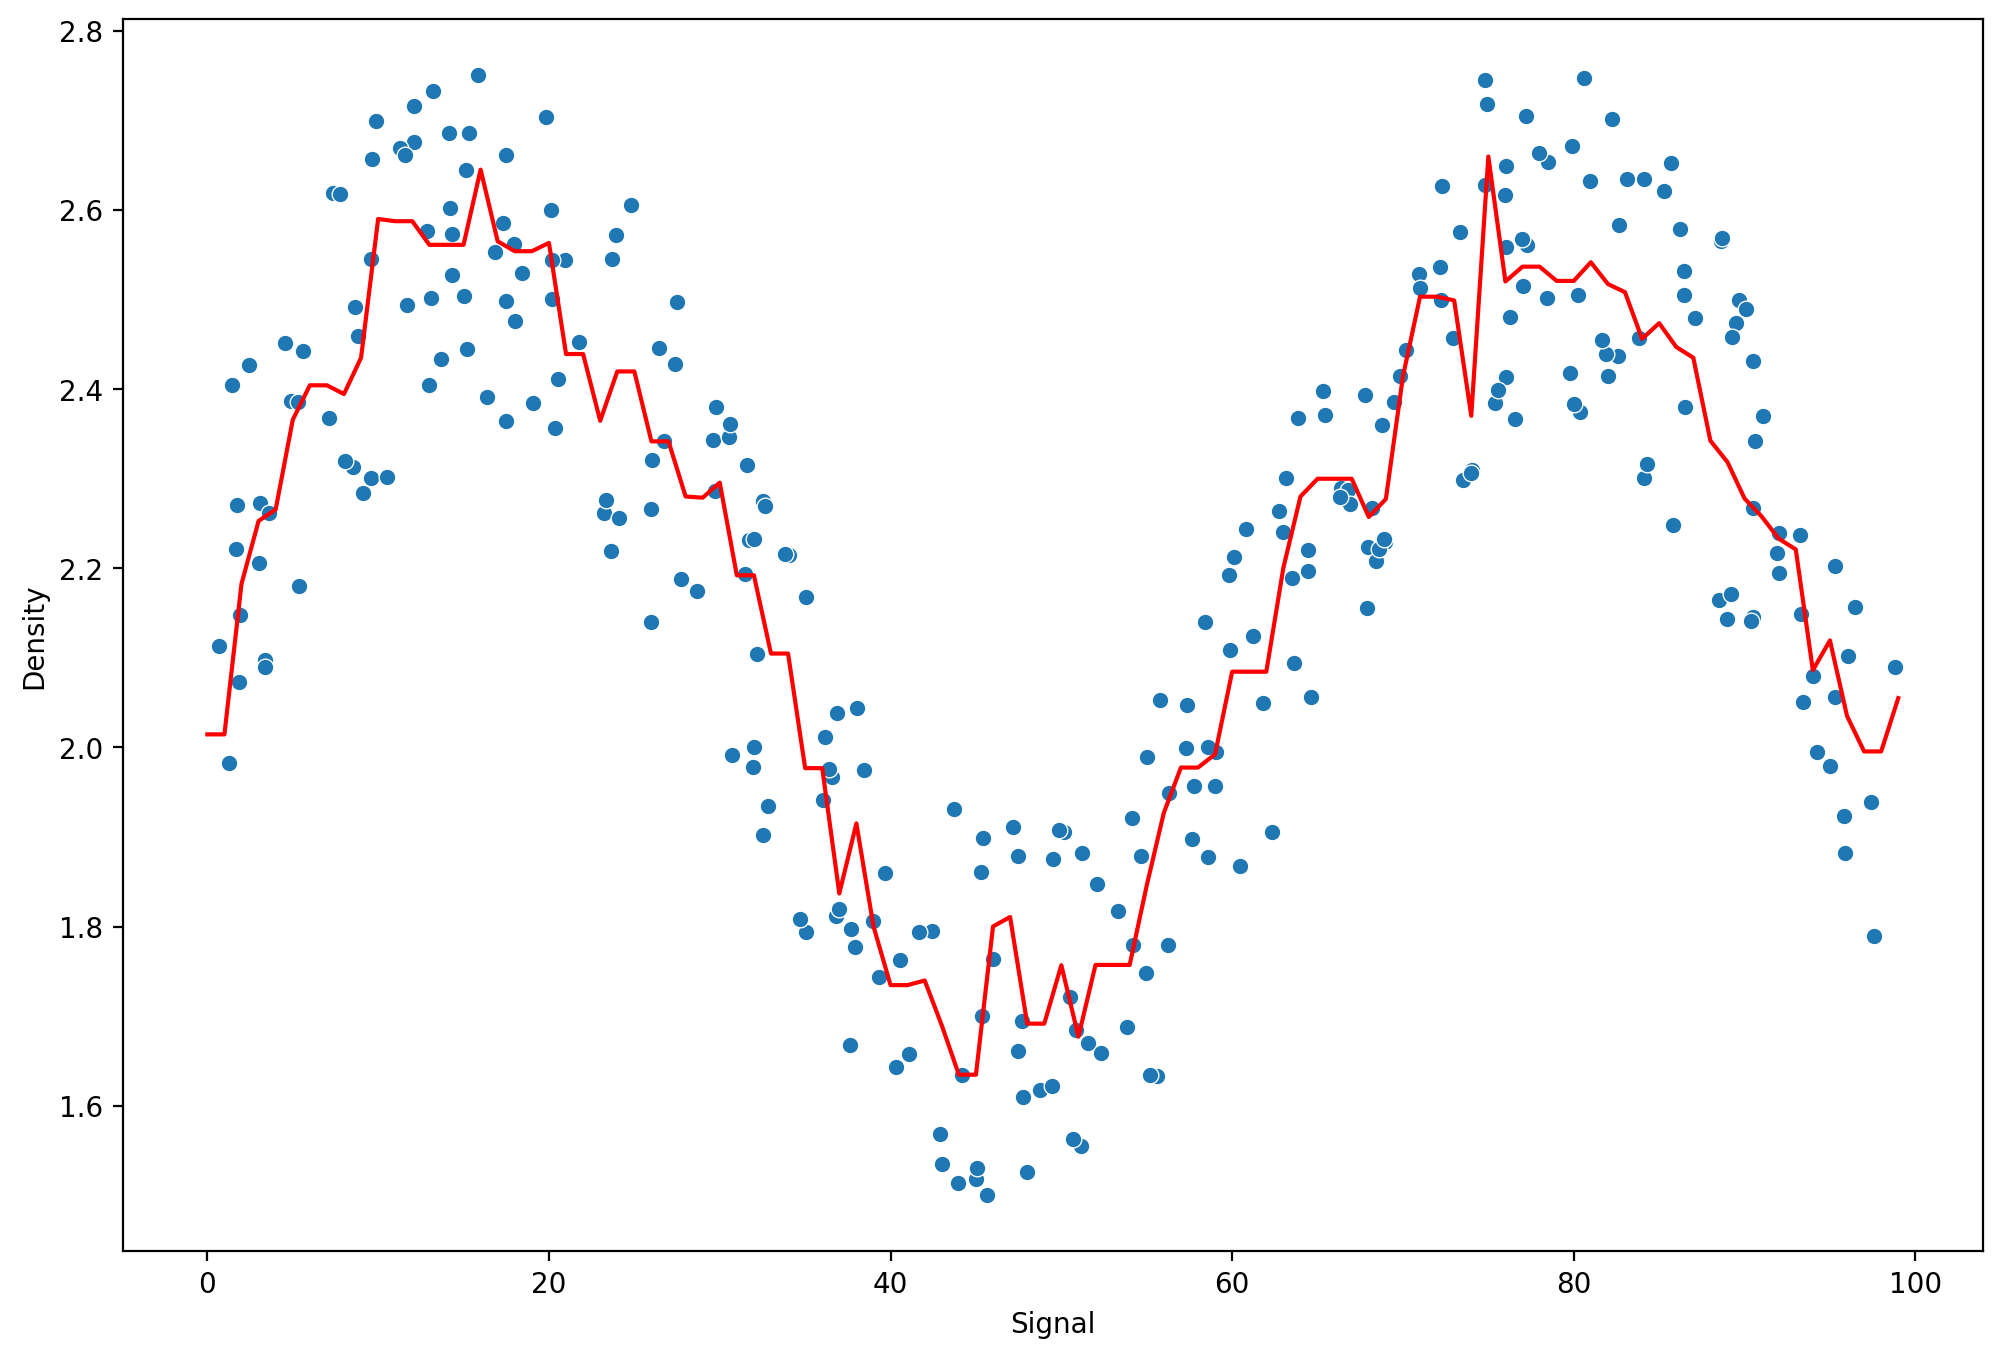

In [60]:
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

RMSE:0.1443449757937769
MAE:0.12766644397049398


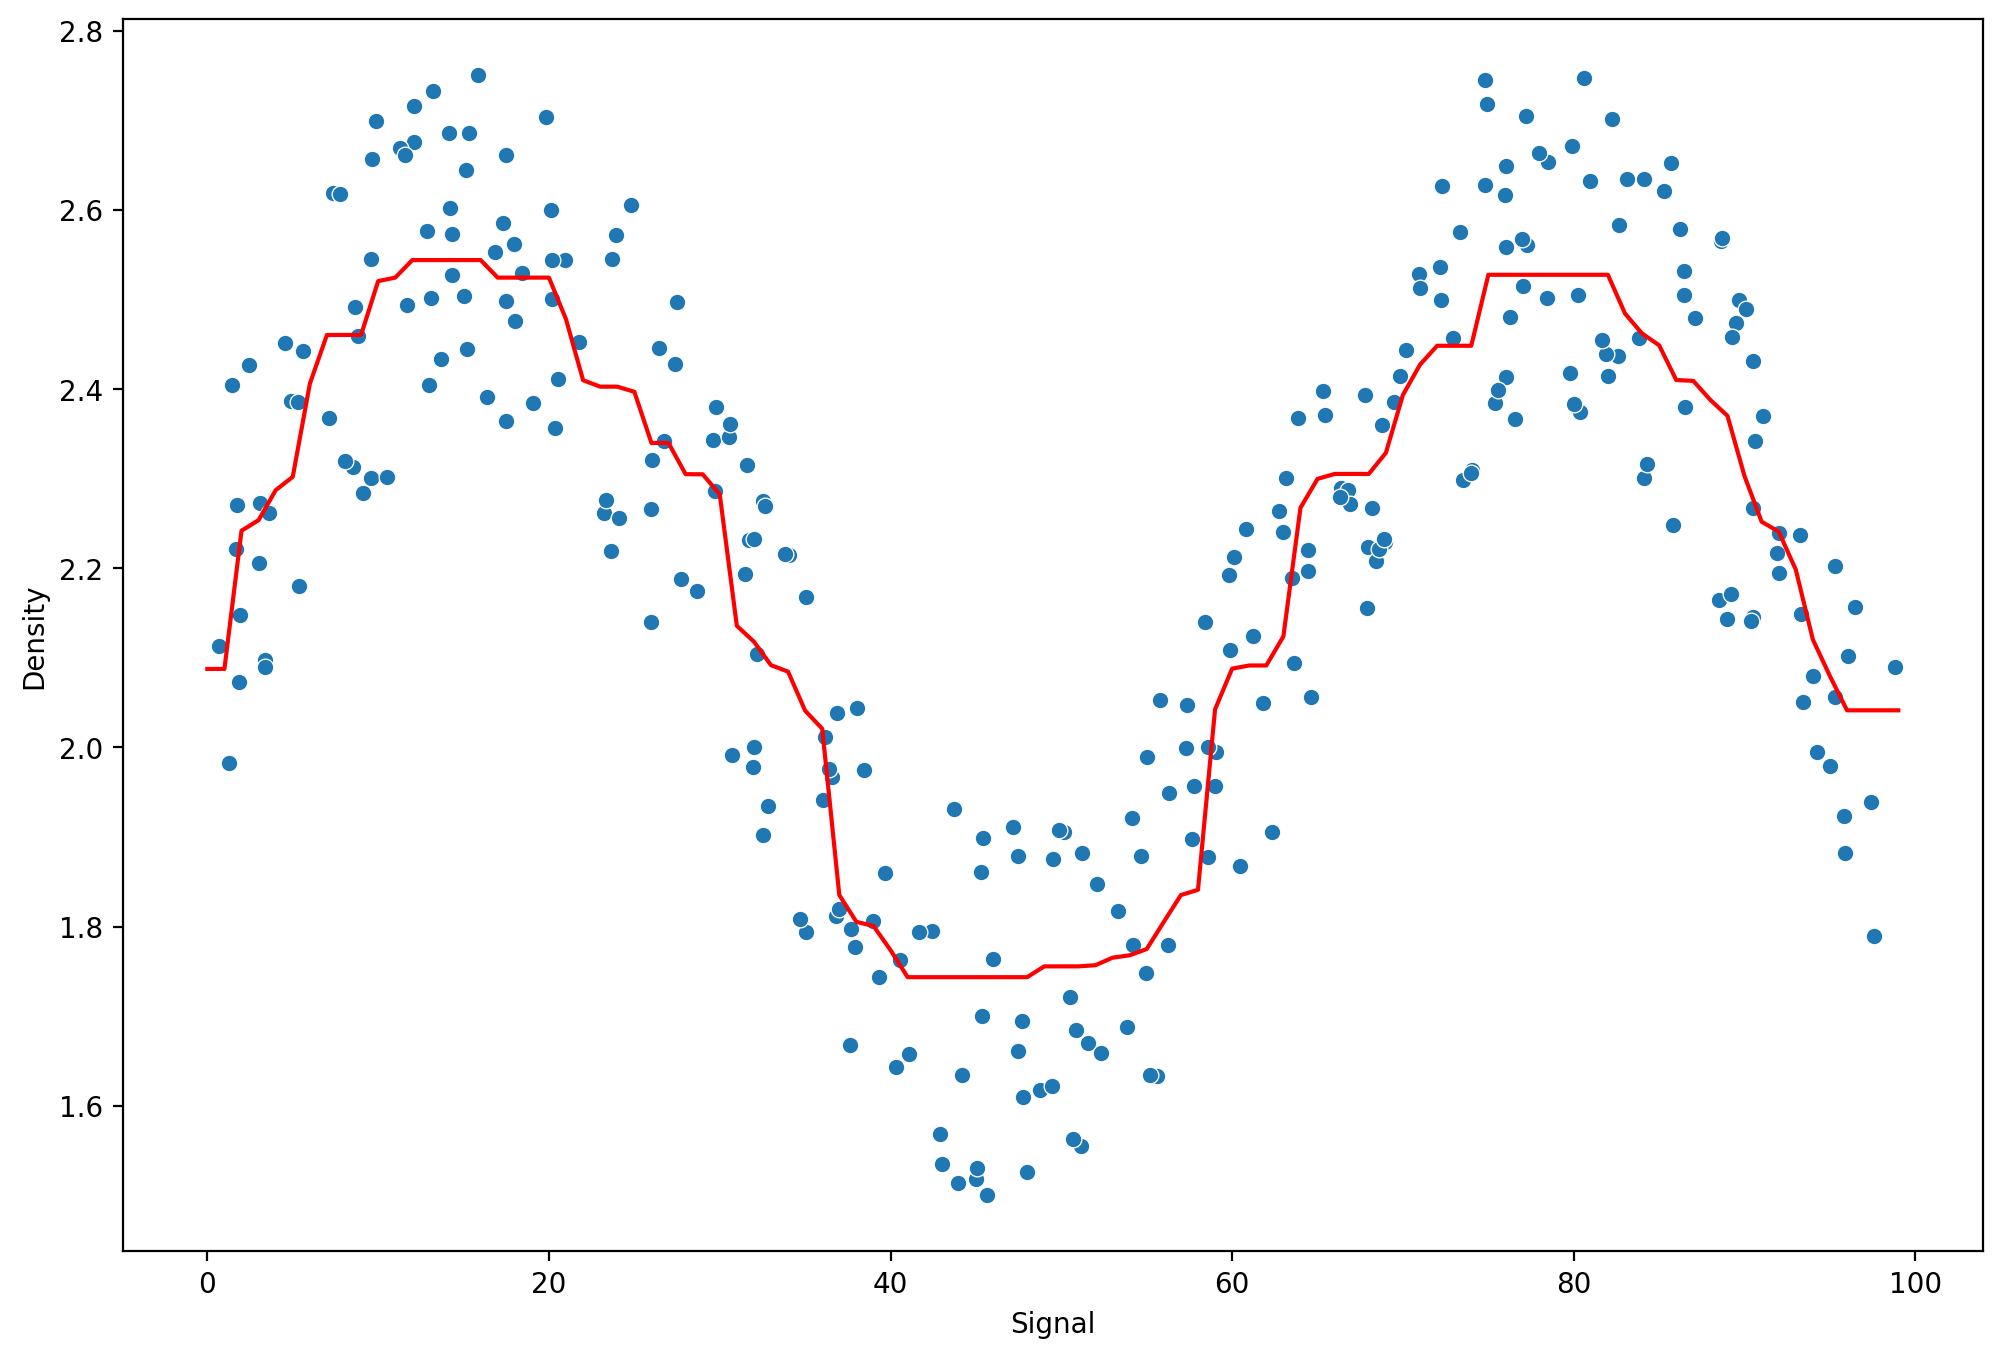

In [61]:
model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)